<a href="https://colab.research.google.com/github/junting-huang/data_storytelling/blob/main/case_9_sonification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sonification
- why is sound used for storytelling\
  disability, information density, time-based, immersion, affect
- how is sound used for storytelling\
  converting data into sound

## case 9.1 parameter mapping
how can we listen to temperature?

- data collection
- data normalization
- parameter selection
- mapping function
- sonification

## exercise 9.1
add or change parameters

## exercise 9.2
plot different sets of data

## example 9.1
- [1,200 Years of Earth’s Climate, Transformed into Sound](https://ccrma.stanford.edu/news/listen-1200-years-of-earth-s-climate-transformed-sound)

## case 9.2 spectral mapping
how can we listen to colors of noise?
- white noise
- pink noise
- brown noise

## other examples
audification, event-based, model-based, and other models
- [The Sound of Two Black Holes Colliding](https://www.ligo.caltech.edu/video/ligo20160211v2)
- [Hatnote Listen to Wikipedia](http://listen.hatnote.com/)

In [ ]:
pip install MIDIUtil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for MIDIUtil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54567 sha256=9808e950b77b50d32c369da9e2910c58abd26c08bac857bd6dd319c0d7e0acfd
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built MIDIUtil


In [ ]:
from midiutil import MIDIFile

# Input data: Daily average temperatures for a city over 10 days (in degrees Celsius)
data = [15, 18, 20, 22, 24, 26, 28, 26, 24, 22]

# Create a new MIDI file with one track
midi = MIDIFile(1)

# Set the track number and tempo
track = 0
time = 0
midi.addTrackName(track, time, "Temperature Track")
midi.addTempo(track, time, 120)

# Parameter mapping from data to MIDI note numbers
# Here we map the range of the temperatures (15 to 28) to the range of MIDI note numbers (60 to 108)
for i, value in enumerate(data):
    note_number = int((value - min(data)) / (max(data) - min(data)) * (108 - 60) + 60)
    midi.addNote(track, 0, note_number, time + i, 1, 100)

# Write the MIDI file to disk
with open("temperature_trend.mid", "wb") as output_file:
    midi.writeFile(output_file)

In [ ]:
from midiutil import MIDIFile

# Input data: Daily average temperatures for four cities over 10 days (in degrees Celsius)
data = {
    "City1": [15, 18, 20, 22, 24, 26, 28, 26, 24, 22],
    "City2": [10, 12, 14, 16, 18, 20, 22, 20, 18, 16],
    "City3": [20, 22, 24, 26, 28, 30, 32, 30, 28, 26],
    "City4": [25, 27, 29, 31, 33, 35, 37, 35, 33, 31]
}

# Create a new MIDI file with four tracks
midi = MIDIFile(len(data))

# Set the tempo
time = 0
tempo = 120

# Parameter mapping from data to MIDI note numbers
# Here we map the range of the temperatures (10 to 37) to the range of MIDI note numbers (60 to 108)
for i, (city, temperatures) in enumerate(data.items()):
    midi.addTrackName(i, time, city)
    midi.addTempo(i, time, tempo)
    for j, value in enumerate(temperatures):
        note_number = int((value - 10) / (37 - 10) * (108 - 60) + 60)
        midi.addNote(i, 0, note_number, time + j, 1, 100)

# Write the MIDI file to disk
with open("temperature_trends.mid", "wb") as output_file:
    midi.writeFile(output_file)

In [ ]:
pip install numpy matplotlib scipy

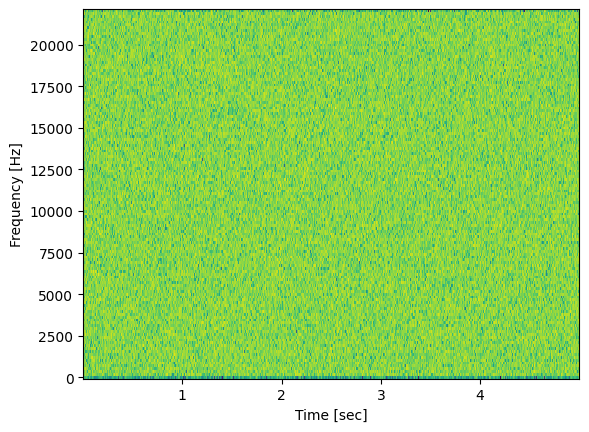

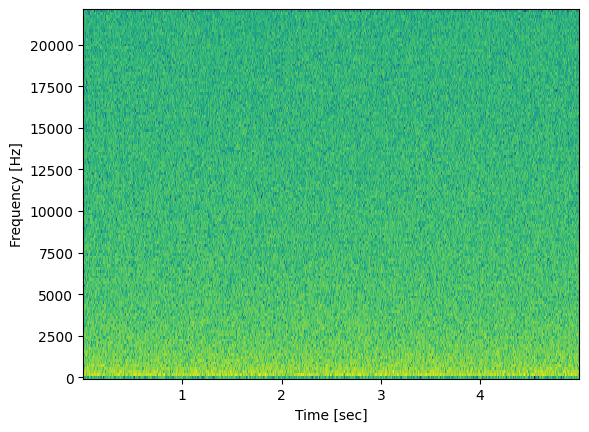

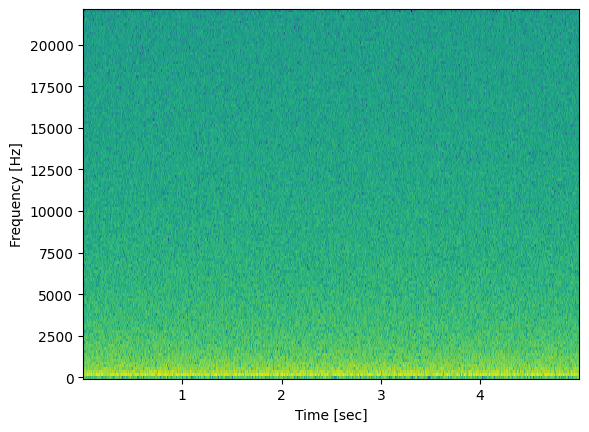

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy import signal

# Function to generate noise
def generate_noise(color, fs, duration):
    N = fs * duration
    if color == 'white':
        noise = np.random.normal(size=N)
    elif color == 'pink':
        uneven = N % 2
        X = np.random.normal(size=N//2+1+uneven)
        S = np.sqrt(np.arange(len(X)) + 1.)  # +1 to avoid divide by zero
        y = (np.fft.irfft(X / S)).real
        if uneven:
            y = y[:-1]
        noise = y
    elif color == 'brown':
        uneven = N % 2
        X = np.random.normal(size=N//2+1+uneven)
        S = (np.arange(len(X)) + 1)  # +1 to avoid divide by zero
        y = (np.fft.irfft(X / S)).real
        if uneven:
            y = y[:-1]
        noise = y
    else:
        print("Invalid color. Choose from 'white', 'pink', or 'brown'.")
        return None
    scaled = np.int16(noise/np.max(np.abs(noise)) * 32767)
    return scaled

# Function to save noise as WAV file
def save_as_wav(noise, fs, filename):
    write(filename, fs, noise)

# Function to plot spectrogram
def plot_spectrogram(noise, fs):
    f, t, Sxx = signal.spectrogram(noise, fs)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

# Generate and save noises
fs = 44100  # Sample rate
duration = 5  # seconds
for color in ['white', 'pink', 'brown']:
    noise = generate_noise(color, fs, duration)
    if noise is not None:
        filename = f'{color}_noise.wav'
        save_as_wav(noise, fs, filename)
        plot_spectrogram(noise, fs)